In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

# supress scientific notation
np.set_printoptions(suppress=True)
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset. 

### 1a. Choose features other than the ones used in the lesson.

In [3]:
df = sns.load_dataset("iris")

# Since we have an ask of using different features, let's whip up a couple more:
# Feature Engineering
df["sepal_area"] = df.sepal_length * df.sepal_width
df["petal_area"] = df.petal_length * df.petal_width

In [4]:
train_validate, test = train_test_split(df, train_size=.80, random_state=1349)
train, validate = train_test_split(train_validate, random_state=1349)

train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [5]:
# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["species"]).columns.tolist()

# .copy() makes a proper copy
# this is an alternative to wrapping the scaled numpy array in a pd.Dataframe()
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# apply our scaler (fit only on train!)
train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [6]:
# look at the head
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
115,0.583333,0.500000,0.724138,0.916667,virginica,0.523477,0.766497
80,0.333333,0.166667,0.465517,0.416667,versicolor,0.159840,0.258249
4,0.194444,0.666667,0.051724,0.041667,setosa,0.399600,0.010787
86,0.666667,0.458333,0.620690,0.583333,versicolor,0.537962,0.440355
20,0.305556,0.583333,0.103448,0.041667,setosa,0.417582,0.014594


### 1b. Visualize the results of your clustering.
### 1c. Use the elbow method to visually select a good value for k.
### 1d. Repeat the clustering, this time with 3 different features.

In [7]:
# Fit K-Means (just on train, again!) with 3 different features
X = train_scaled[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.predict(X)
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
115,0.583333,0.500000,0.724138,0.916667,virginica,0.523477,0.766497,1
80,0.333333,0.166667,0.465517,0.416667,versicolor,0.159840,0.258249,2
4,0.194444,0.666667,0.051724,0.041667,setosa,0.399600,0.010787,0
86,0.666667,0.458333,0.620690,0.583333,versicolor,0.537962,0.440355,2
20,0.305556,0.583333,0.103448,0.041667,setosa,0.417582,0.014594,0


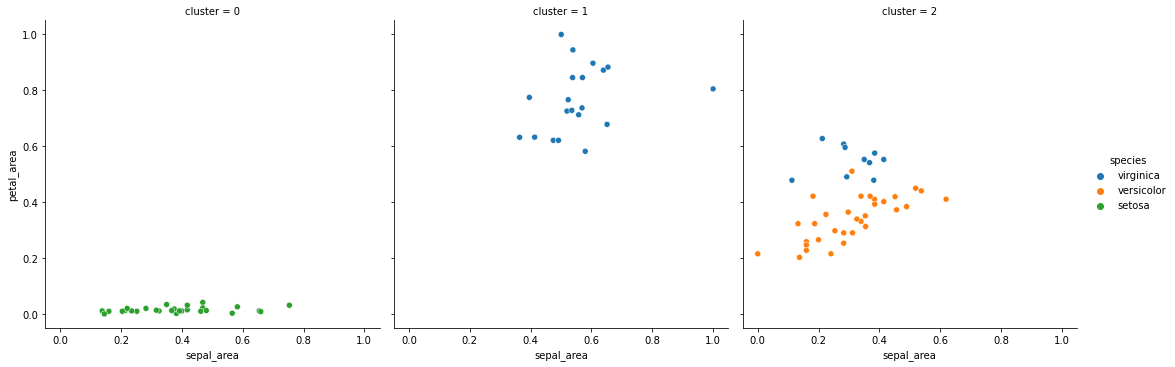

In [8]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_scaled)

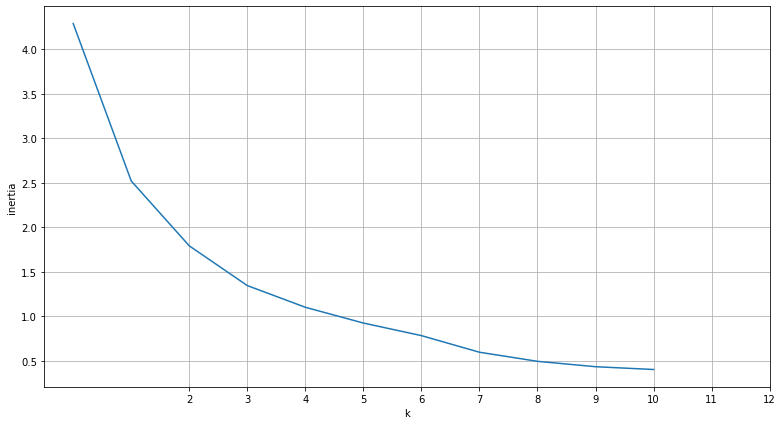

In [9]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [10]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
115,0.583333,0.500000,0.724138,0.916667,virginica,0.523477,0.766497,1
80,0.333333,0.166667,0.465517,0.416667,versicolor,0.159840,0.258249,2
4,0.194444,0.666667,0.051724,0.041667,setosa,0.399600,0.010787,0
86,0.666667,0.458333,0.620690,0.583333,versicolor,0.537962,0.440355,2
20,0.305556,0.583333,0.103448,0.041667,setosa,0.417582,0.014594,0


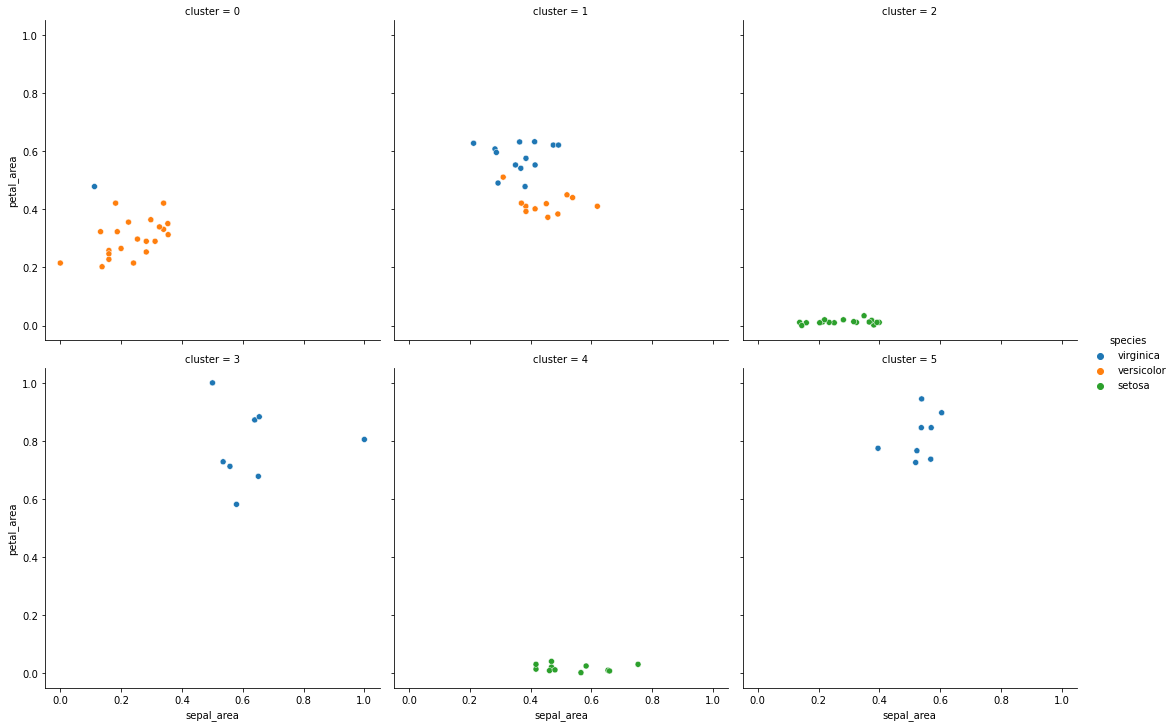

In [11]:
# Fit K-Means with 6 different features
X = train_scaled[["sepal_area", "petal_area", "sepal_length", "petal_width"]]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", col_wrap=3, data=train_scaled)

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

In [ ]:
# Another way to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

In [ ]:
# Labels (same as from predict)
kmeans.labels_

In [ ]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

In [ ]:
# Let's take a look at k = 2 clusters.

# make the thing
kmeans = KMeans(n_clusters=2, random_state=1349)
# fit the thing (on scaled data!)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
sns.scatterplot(x='sepal_width', y='petal_width', data=X_scaled, hue='cluster')

In [ ]:
# We can observe interia as a baked in property of our kmeans object
kmeans.inertia_

In [ ]:
X = iris[['petal_width', 'sepal_width']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k = 2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# intertia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')